In [1]:
import sys
sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages')
print ( sys.path )
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 22,
     'axes.labelpad': 8.0,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
print ( mpl.rcParams )

['/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/condor/8.9.11-e1651/x86_64-centos7-gcc11-opt/lib/python3', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/itk', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python39.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9/lib-dynload', '/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packa

In [2]:
uproot.__version__

'4.1.5'

In [31]:
save_figures = True

In [4]:
# root = uproot.open( "data/SM_ee_mumu_z_40GeV/run_01/unweighted_events.root" )
root = uproot.open( "data/SM_ee_ee_100GeV/run_02/unweighted_events.root" )

In [5]:
tree = root[ "LHEF" ]

In [6]:
tree.keys()

['Event',
 'Event/Event.fUniqueID',
 'Event/Event.fBits',
 'Event/Event.Number',
 'Event/Event.Nparticles',
 'Event/Event.ProcessID',
 'Event/Event.Weight',
 'Event/Event.ScalePDF',
 'Event/Event.CouplingQED',
 'Event/Event.CouplingQCD',
 'Event_size',
 'Rwgt',
 'Rwgt/Rwgt.fUniqueID',
 'Rwgt/Rwgt.fBits',
 'Rwgt/Rwgt.Weight',
 'Rwgt_size',
 'Particle',
 'Particle/Particle.fUniqueID',
 'Particle/Particle.fBits',
 'Particle/Particle.PID',
 'Particle/Particle.Status',
 'Particle/Particle.Mother1',
 'Particle/Particle.Mother2',
 'Particle/Particle.ColorLine1',
 'Particle/Particle.ColorLine2',
 'Particle/Particle.Px',
 'Particle/Particle.Py',
 'Particle/Particle.Pz',
 'Particle/Particle.E',
 'Particle/Particle.M',
 'Particle/Particle.PT',
 'Particle/Particle.Eta',
 'Particle/Particle.Phi',
 'Particle/Particle.Rapidity',
 'Particle/Particle.LifeTime',
 'Particle/Particle.Spin',
 'Particle_size']

In [7]:
keys_events = [ 'Event/Event.Number',
         'Event/Event.Nparticles',
         'Event/Event.ProcessID',
         'Event/Event.Weight',
         'Event/Event.ScalePDF',
         'Event/Event.CouplingQED',
         'Event/Event.CouplingQCD' ]
events = tree.arrays( keys_events, library="ak", how="zip" )

In [8]:
events = events[ 'Event/Event' ]

In [9]:
len( events )

50000

In [10]:
ak.to_list( events[10] )

[{'Number': 11,
  'Nparticles': 4,
  'ProcessID': 1,
  'Weight': 398.01,
  'ScalePDF': 50.0,
  'CouplingQED': 0.007546771,
  'CouplingQCD': 0.1297865}]

In [11]:
keys_particles = [ 'Particle/Particle.PID',
         'Particle/Particle.Status',
         'Particle/Particle.Mother1',
         'Particle/Particle.Mother2',
         'Particle/Particle.ColorLine1',
         'Particle/Particle.ColorLine2',
         'Particle/Particle.Px',
         'Particle/Particle.Py',
         'Particle/Particle.Pz',
         'Particle/Particle.E',
         'Particle/Particle.M',
         'Particle/Particle.PT',
         'Particle/Particle.Eta',
         'Particle/Particle.Phi',
         'Particle/Particle.Rapidity',
         'Particle/Particle.LifeTime',
         'Particle/Particle.Spin' ]
particles = tree.arrays( keys_particles, library="ak", how="zip" )

In [12]:
len( particles )

50000

In [13]:
particles = particles[ 'Particle/Particle' ]

In [14]:
particles

<Array [[{PID: 11, Status: -1, ... Spin: -1}]] type='50000 * var * {"PID": int32...'>

In [15]:
particles[ "event" ] = events[ 'Number' ][:,0]

In [16]:
ak.num( particles )

<Array [4, 4, 4, 4, 4, 4, ... 4, 4, 4, 4, 4, 4] type='50000 * int64'>

In [17]:
ak.to_list( particles[100] )

[{'PID': 11,
  'Status': -1,
  'Mother1': -1,
  'Mother2': -1,
  'ColorLine1': 0,
  'ColorLine2': 0,
  'Px': 0.0,
  'Py': 0.0,
  'Pz': 50.0,
  'E': 50.0,
  'M': 0.0,
  'PT': 0.0,
  'Eta': 999.9,
  'Phi': 0.0,
  'Rapidity': 999.9,
  'LifeTime': 0.0,
  'Spin': 1.0,
  'event': 101},
 {'PID': 11,
  'Status': -1,
  'Mother1': -1,
  'Mother2': -1,
  'ColorLine1': 0,
  'ColorLine2': 0,
  'Px': -0.0,
  'Py': -0.0,
  'Pz': -50.0,
  'E': 50.0,
  'M': 0.0,
  'PT': 0.0,
  'Eta': -999.9,
  'Phi': 0.0,
  'Rapidity': -999.9,
  'LifeTime': 0.0,
  'Spin': -1.0,
  'event': 101},
 {'PID': 11,
  'Status': 1,
  'Mother1': 0,
  'Mother2': 1,
  'ColorLine1': 0,
  'ColorLine2': 0,
  'Px': -5.6032226939,
  'Py': 26.041689475,
  'Pz': 42.313523899,
  'E': 50.0,
  'M': 0.0,
  'PT': 26.637674359255943,
  'Eta': 1.2428641088591426,
  'Phi': 1.7827288179081413,
  'Rapidity': 1.2428641088716694,
  'LifeTime': 0.0,
  'Spin': 1.0,
  'event': 101},
 {'PID': 11,
  'Status': 1,
  'Mother1': 0,
  'Mother2': 1,
  'ColorLin

In [18]:
columns_particles = [ key_[ len('Particle/Particle.') : ] for key_ in keys_particles ]
columns_particles

['PID',
 'Status',
 'Mother1',
 'Mother2',
 'ColorLine1',
 'ColorLine2',
 'Px',
 'Py',
 'Pz',
 'E',
 'M',
 'PT',
 'Eta',
 'Phi',
 'Rapidity',
 'LifeTime',
 'Spin']

In [19]:
df = pd.DataFrame( np.array( ak.flatten( particles ) ) ).set_index( ['event'], drop=False )

In [20]:
df

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
1,11,-1,-1,-1,0,0,0.000000,0.000000,50.000000,50.0,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,1
1,11,-1,-1,-1,0,0,-0.000000,-0.000000,-50.000000,50.0,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,-1.0,1
1,11,1,0,1,0,0,-36.893460,-9.133495,32.487719,50.0,0.0,38.007211,0.774874,-2.898908,0.774874,0.0,1.0,1
1,11,1,0,1,0,0,36.893460,9.133495,-32.487719,50.0,0.0,38.007211,-0.774874,0.242685,-0.774874,0.0,-1.0,1
2,11,-1,-1,-1,0,0,0.000000,0.000000,50.000000,50.0,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,11,1,0,1,0,0,4.909781,-24.735187,-43.174814,50.0,0.0,25.217760,-1.306929,-1.374849,-1.306929,0.0,-1.0,49999
50000,11,-1,-1,-1,0,0,0.000000,0.000000,50.000000,50.0,0.0,0.000000,999.900000,0.000000,999.900000,0.0,-1.0,50000
50000,11,-1,-1,-1,0,0,-0.000000,-0.000000,-50.000000,50.0,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,-1.0,50000


In [21]:
df[ df.event == 20 ]

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
20,11,-1,-1,-1,0,0,0.000000,0.000000,50.000000,50.0,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,20
20,11,-1,-1,-1,0,0,-0.000000,-0.000000,-50.000000,50.0,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,-1.0,20
20,11,1,0,1,0,0,26.771839,-29.849731,29.870758,50.0,0.0,40.096606,0.689118,-0.839704,0.689118,0.0,1.0,20
20,11,1,0,1,0,0,-26.771839,29.849731,-29.870758,50.0,0.0,40.096606,-0.689118,2.301889,-0.689118,0.0,-1.0,20


In [22]:
df[ 'cos_theta' ] = df.Pz / np.sqrt( df.Pz ** 2 + df.PT ** 2 )  

In [23]:
df

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event,cos_theta
event,,,,,,,,,,,,,,,,,,,
1,11,-1,-1,-1,0,0,0.000000,0.000000,50.000000,50.0,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,1,1.000000
1,11,-1,-1,-1,0,0,-0.000000,-0.000000,-50.000000,50.0,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,-1.0,1,-1.000000
1,11,1,0,1,0,0,-36.893460,-9.133495,32.487719,50.0,0.0,38.007211,0.774874,-2.898908,0.774874,0.0,1.0,1,0.649754
1,11,1,0,1,0,0,36.893460,9.133495,-32.487719,50.0,0.0,38.007211,-0.774874,0.242685,-0.774874,0.0,-1.0,1,-0.649754
2,11,-1,-1,-1,0,0,0.000000,0.000000,50.000000,50.0,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,2,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,11,1,0,1,0,0,4.909781,-24.735187,-43.174814,50.0,0.0,25.217760,-1.306929,-1.374849,-1.306929,0.0,-1.0,49999,-0.863496
50000,11,-1,-1,-1,0,0,0.000000,0.000000,50.000000,50.0,0.0,0.000000,999.900000,0.000000,999.900000,0.0,-1.0,50000,1.000000
50000,11,-1,-1,-1,0,0,-0.000000,-0.000000,-50.000000,50.0,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,-1.0,50000,-1.000000


In [24]:
# selection = ( ( df.Status == 1 ) & ( df.PID == 13 ) )
# selection = ( ( df.Status == 1 ) & ( df.PID == -13 ) )
selection = ( ( df.Status == 1 ) & ( df.PID == 11 ) )
df_sel = df[ selection ]
df_sel

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event,cos_theta
event,,,,,,,,,,,,,,,,,,,
1,11,1,0,1,0,0,-36.893460,-9.133495,32.487719,50.0,0.0,38.007211,0.774874,-2.898908,0.774874,0.0,1.0,1,0.649754
1,11,1,0,1,0,0,36.893460,9.133495,-32.487719,50.0,0.0,38.007211,-0.774874,0.242685,-0.774874,0.0,-1.0,1,-0.649754
2,11,1,0,1,0,0,-25.389042,1.350156,43.053149,50.0,0.0,25.424916,1.297441,3.088464,1.297441,0.0,1.0,2,0.861063
2,11,1,0,1,0,0,25.389042,-1.350156,-43.053149,50.0,0.0,25.424916,-1.297441,-0.053129,-1.297441,0.0,1.0,2,-0.861063
3,11,1,0,1,0,0,-7.738881,-32.889784,36.856096,50.0,0.0,33.787989,0.944147,-1.801890,0.944147,0.0,1.0,3,0.737122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49998,11,1,0,1,0,0,16.990463,-45.246296,-12.810030,50.0,0.0,48.331182,-0.262038,-1.211578,-0.262038,0.0,-1.0,49998,-0.256201
49999,11,1,0,1,0,0,-4.909781,24.735187,43.174814,50.0,0.0,25.217760,1.306929,1.766743,1.306929,0.0,1.0,49999,0.863496
49999,11,1,0,1,0,0,4.909781,-24.735187,-43.174814,50.0,0.0,25.217760,-1.306929,-1.374849,-1.306929,0.0,-1.0,49999,-0.863496


In [25]:
n_events = len( df_sel )
n_events

100000

In [26]:
weights = np.ones( n_events ) * ( 1/n_events )
weights

array([1.e-05, 1.e-05, 1.e-05, ..., 1.e-05, 1.e-05, 1.e-05])

Text(0, 0.5, 'Número de eventos')

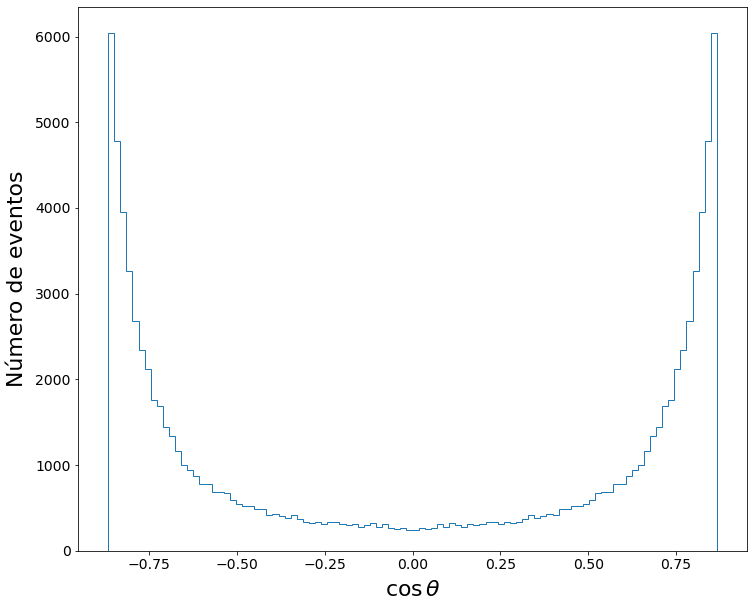

In [27]:
fig = plt.figure( figsize=(12,10) )
plt.hist( df_sel[ 'cos_theta' ], histtype='step', bins=100 )
# plt.hist( df_sel[ 'cos_theta' ], weights=weights, histtype='step', bins=20 )
# counts, bins = np.histogram( df_sel[ 'cos_theta' ], weights=weights, bins=20 )
# X = ( bins[:-1] + bins[1:] ) / 2
# plt.plot( X, counts, 'ko' )
plt.xlabel( r"$\cos\theta$" )
plt.ylabel( "Número de eventos" )

# if save_figures:
#     plt.savefig( "figs/SM_ee_mumu_40GeV_cos_theta.pdf", bbox_inches='tight' )
#     plt.savefig( "figs/SM_ee_mumu_40GeV_cos_theta.png", bbox_inches='tight' )

56.183187614374695
(56.183187614374695, 6.23758684863137e-13)


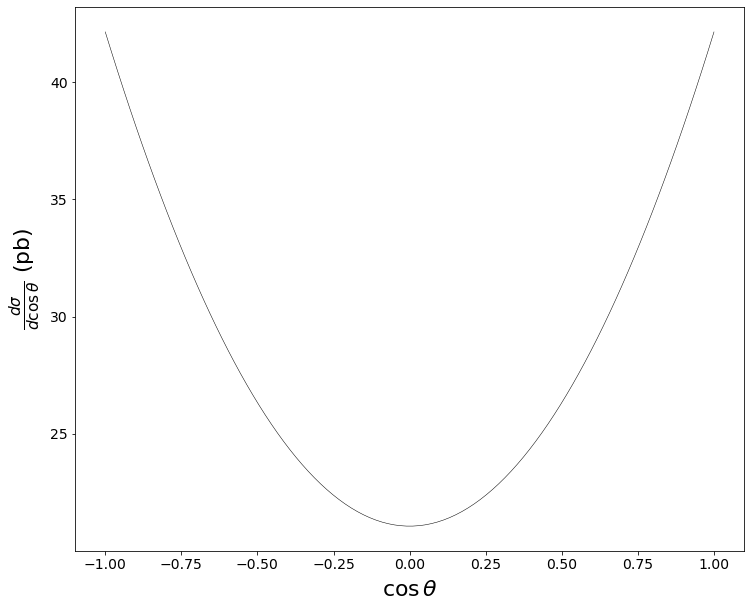

In [30]:
import scipy.constants

fig = plt.figure( figsize=(12,10) )

k = ( ( scipy.constants.hbar / ( 1e+9 * scipy.constants.eV ) ) *  scipy.constants.c ) ** 2
inv_alpha = 134.7
alpha = 1. / inv_alpha
sqrt_s = 40.0
f_costheta = lambda x_:  1e+40 * k * ( np.pi * alpha**2 / ( 2 * sqrt_s**2 ) ) * ( 1.0 + x_ ** 2 )
sigma = 1e+40 * k * 4 * np.pi * alpha**2 / ( 3 * sqrt_s**2 )

# sigma = 56.2 # pb
# f_costheta = lambda x_:  ( 3 * sigma / 8 ) * ( 1.0 + x_ ** 2 )

print ( sigma )

costheta_max = 1.

xplot_ = np.linspace( -costheta_max, costheta_max, 100 )
plt.plot( xplot_, f_costheta( xplot_ ), 'k-', linewidth=0.5 )

plt.xlabel( r"$\cos\theta$" )
plt.ylabel( r"$\frac{ d\sigma }{ d \cos\theta }$ (pb)" )

import scipy.integrate
result = scipy.integrate.quad( f_costheta, -1., 1. )
print ( result )

0.8660254037844386
0.5235987755982989
-0.8660254037844385
372.52570574581785 2.2110543444467043e-06


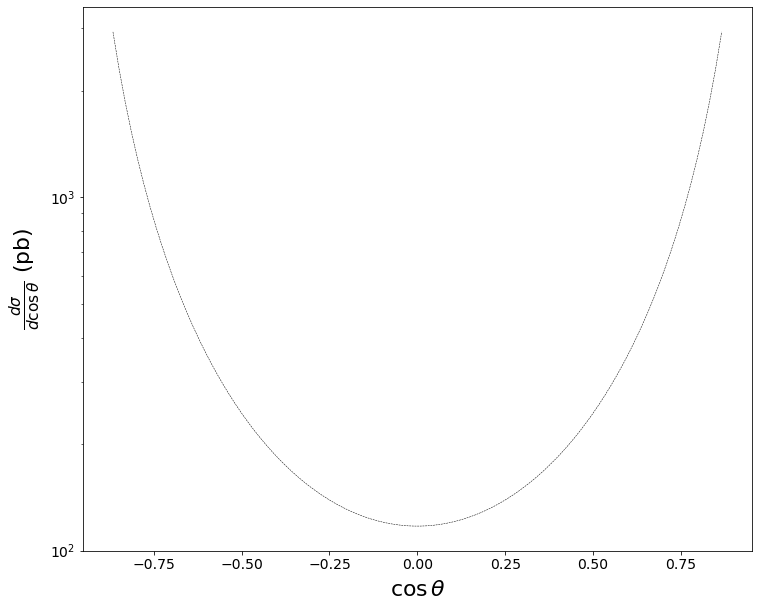

In [28]:
import scipy.constants

fig = plt.figure( figsize=(12,10) )

E = 50.
pt_min = 25.
costheta_max = np.sqrt( 1. - ( pt_min / E )**2 )
print ( costheta_max )
theta_min = np.arccos( costheta_max )
print ( theta_min )
print ( np.cos( np.pi-theta_min ) )

inv_alpha = 137.
alpha = 1. / inv_alpha
k = ( ( scipy.constants.hbar / ( 1e+09 * scipy.constants.eV ) ) *  scipy.constants.c ) ** 2

def f_theta( th ):
#     print ( th )
    return 1e+40 * k * 2 * np.pi * np.abs( np.sin( th ) ) * ( alpha**2 / ( 8 * E**2 ) ) * ( ( 1. + np.cos( th/2 )**4 )/( np.sin( th/2 )**4 ) + ( 1. + np.sin( th/2 )**4 )/( np.cos( th/2 )**4 ) + 2./( np.sin( th/2 )**2 * np.cos( th/2 )**2 ) )
def f_costheta( cos_theta ):
    th_ = np.arccos( cos_theta )
#     print ( th_ )
    return 1e+40 * k * 2 * np.pi * ( alpha**2 / ( 8 * E**2 ) ) * ( ( 1. + np.cos( th_/2 )**4 )/( np.sin( th_/2 )**4 ) + ( 1. + np.sin( th_/2 )**4 )/( np.cos( th_/2 )**4 ) + 2./( np.sin( th_/2 )**2 * np.cos( th_/2 )**2 ) )

# xplot_ = np.linspace( theta_min, (np.pi-theta_min), 100 )
# xplot_ = np.cos( xplot_ )
# plt.plot( xplot_, f_theta( xplot_ ), 'k-', linewidth=0.5 )
# plt.plot( xplot_, f_costheta( xplot_ ), 'k--', linewidth=0.5 )

xplot_ = np.linspace( -costheta_max, costheta_max, 100 )
plt.plot( xplot_, f_costheta( xplot_ ), 'k--', linewidth=0.5 )

# plt.xlabel( r"$\theta$" )
# plt.ylabel( r"$\frac{ d\sigma }{ d \theta }$ (pb)" )
plt.xlabel( r"$\cos\theta$" )
plt.ylabel( r"$\frac{ d\sigma }{ d \cos\theta }$ (pb)" )

plt.yscale( 'log' )

import scipy.integrate
I, sig_I = scipy.integrate.quad( f_costheta, -costheta_max, costheta_max )
I = ( 0.5 * I )
sig_I = ( 0.5 * sig_I )
print ( I, sig_I )

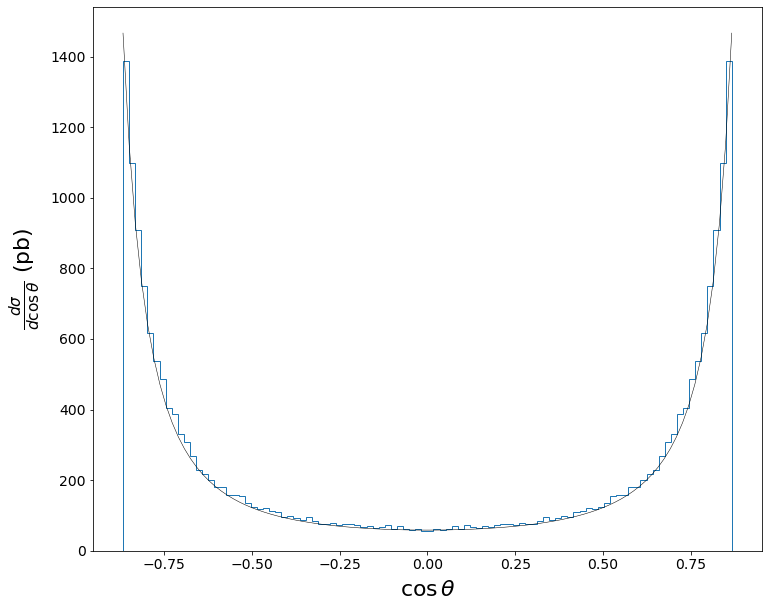

In [32]:
fig = plt.figure( figsize=(12,10) )

# mumu
# sigma_MC = 56.2 # pb
# ee
sigma_MC = 398.

counts, bins = np.histogram( df_sel[ 'cos_theta' ], weights=weights, bins=100 )
X = ( bins[:-1] + bins[1:] ) / 2

weights_binwidth = weights / ( bins[1] - bins[0] )
counts_binwidth = counts / ( bins[1] - bins[0] )

weights_sigma = sigma_MC * weights_binwidth
counts_sigma = sigma_MC * counts_binwidth

plt.hist( df_sel[ 'cos_theta' ], weights=weights_sigma, histtype='step', bins=100 )
# plt.plot( X, counts_sigma, 'ko' )

xplot_ = np.linspace( -costheta_max, costheta_max, 100 )
# plt.plot( xplot_, f_costheta( xplot_ ), 'k-', linewidth=0.5 )
plt.plot( xplot_, 0.5*f_costheta( xplot_ ), 'k-', linewidth=0.5 )

plt.xlabel( r"$\cos\theta$" )
plt.ylabel( r"$\frac{ d\sigma }{ d \cos\theta }$ (pb)" )

if save_figures:
#     plt.savefig( "figs/SM_ee_mumu_40GeV_cos_theta_cross_section.pdf", bbox_inches='tight' )
#     plt.savefig( "figs/SM_ee_mumu_40GeV_cos_theta_cross_section.png", bbox_inches='tight' )
    plt.savefig( "figs/SM_ee_ee_100GeV_cos_theta_cross_section.pdf", bbox_inches='tight' )
    plt.savefig( "figs/SM_ee_ee_100GeV_cos_theta_cross_section.png", bbox_inches='tight' )

(-5.0, 5.0)

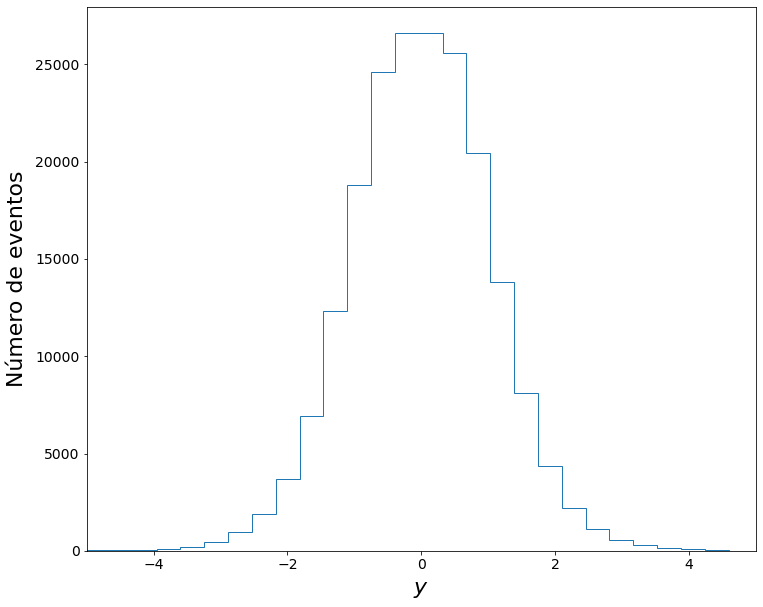

In [33]:
fig = plt.figure( figsize=(12,10) )
plt.hist( df_sel[ 'Rapidity' ], histtype='step', bins=40 )
# plt.hist( df_sel[ 'Rapidity' ], weights=weights, histtype='step', bins=40 )
plt.xlabel( r"$y$" )
plt.ylabel( "Número de eventos" )
plt.xlim( -5., 5. )

Text(0, 0.5, 'Número de eventos')

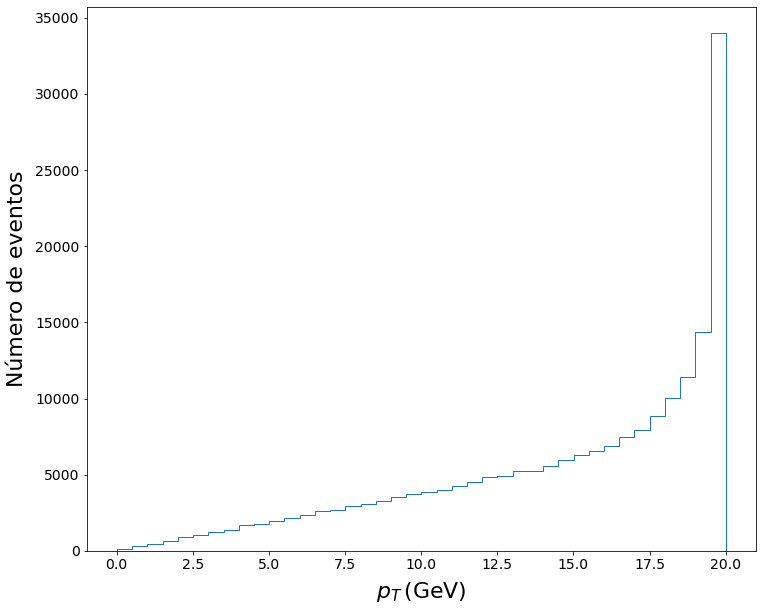

In [34]:
fig = plt.figure( figsize=(12,10) )
plt.hist( df_sel[ 'PT' ], histtype='step', bins=40 )
# plt.hist( df_sel[ 'PT' ], weights=weights, histtype='step', bins=40 )
plt.xlabel( r"$p_T\,(\rm{GeV})$" )
plt.ylabel( "Número de eventos" )